In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests as req
from config import weather_api_key
import time
from datetime import datetime
from scipy.stats import linregress

In [2]:
# create url + key variable 
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=' + weather_api_key

In [3]:
# create latitudes and longitudes in arrays declared as variables, zip the lats and longs together in a new variable
latitudes = np.random.uniform(low=-90.000, high=90.000, size=1500)
longitudes = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(latitudes, longitudes)
lat_lngs

In [4]:
# unpack lat_lngs into a list
coordinates = list(lat_lngs)


In [5]:
# Create a list for holding the cities
cities = []
# identify the nearest city for each latitude and longitude
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # add the city to cities if its not there already
    if city not in cities:
        cities.append(city)
# print count to confirm a sufficient count
len(cities)
    


616

In [6]:
# Create Empty List
city_data = []
# print the beginning of the logging
print('Beginning Data Retrieval    ')
print('-----------------------------')
# create counters
record_count = 1
set_count = 1
# iterate through the cities list
for i, city in enumerate(cities):
    # group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # create a url endpoint for each city
    city_url = url + '&q=' + city.replace(' ', '+')
    # log the url, record, set numbers, and city
    print(f'Processing Record {record_count} of set {set_count} | {city}')
     # Add one to the record count
    record_count +=1
    try:
        # parse json and retrieve the data
        weather_data = req.get(city_url).json()
        # parse out desired data
        city_lat = weather_data['coord']['lat']
        city_lng = weather_data['coord']['lon']
        city_max_temp = weather_data['main']['temp_max']
        city_humidity = weather_data['main']['humidity']
        city_clouds = weather_data['clouds']['all']
        city_wind = weather_data['wind']['speed']
        city_country = weather_data['sys']['country']
        # convert the date to ISO standard and format it
        city_date = datetime.utcfromtimestamp(weather_data['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append city inforation to city_data list
        city_data.append({'City': city.title(), 'Lat':city_lat, 'Lng':city_lng, 'Max Temp': city_max_temp, 'Humidity':city_humidity, 'Cloudiness':city_clouds, 'Wind Speed':city_wind, 'Country':city_country, 'Date':city_date})
    # if error is experienced
    except: 
        print('City not found Skipping....')
        pass
#indicate that data loading is complete
print('---------------------------')
print('Data Retrieval Complete    ')
print('---------------------------')
        
        

Beginning Data Retrieval    
-----------------------------
Processing Record 1 of set 1 | ilulissat
Processing Record 2 of set 1 | fortuna
Processing Record 3 of set 1 | busselton
Processing Record 4 of set 1 | mount gambier
Processing Record 5 of set 1 | taolanaro
City not found Skipping....
Processing Record 6 of set 1 | beringovskiy
Processing Record 7 of set 1 | ust-kulom
Processing Record 8 of set 1 | mataura
Processing Record 9 of set 1 | cherskiy
Processing Record 10 of set 1 | road town
Processing Record 11 of set 1 | bluff
Processing Record 12 of set 1 | illoqqortoormiut
City not found Skipping....
Processing Record 13 of set 1 | belushya guba
City not found Skipping....
Processing Record 14 of set 1 | kodiak
Processing Record 15 of set 1 | arraial do cabo
Processing Record 16 of set 1 | jarocin
Processing Record 17 of set 1 | ribeira grande
Processing Record 18 of set 1 | ushuaia
Processing Record 19 of set 1 | maxixe
Processing Record 20 of set 1 | jamestown
Processing Recor

Processing Record 39 of set 4 | egvekinot
Processing Record 40 of set 4 | tabou
Processing Record 41 of set 4 | kapuskasing
Processing Record 42 of set 4 | upernavik
Processing Record 43 of set 4 | nara
Processing Record 44 of set 4 | malwan
City not found Skipping....
Processing Record 45 of set 4 | port hedland
Processing Record 46 of set 4 | panyutyne
Processing Record 47 of set 4 | sao gabriel da cachoeira
Processing Record 48 of set 4 | dicabisagan
Processing Record 49 of set 4 | byron bay
Processing Record 50 of set 4 | tiksi
Processing Record 1 of set 5 | tortoli
Processing Record 2 of set 5 | amderma
City not found Skipping....
Processing Record 3 of set 5 | victoria
Processing Record 4 of set 5 | yola
Processing Record 5 of set 5 | mahajanga
Processing Record 6 of set 5 | eyl
Processing Record 7 of set 5 | touros
Processing Record 8 of set 5 | adrar
Processing Record 9 of set 5 | meulaboh
Processing Record 10 of set 5 | honiara
Processing Record 11 of set 5 | kampene
Processin

Processing Record 32 of set 8 | solotcha
Processing Record 33 of set 8 | nizhneangarsk
Processing Record 34 of set 8 | college
Processing Record 35 of set 8 | saint anthony
Processing Record 36 of set 8 | chengdu
Processing Record 37 of set 8 | sao jose da coroa grande
Processing Record 38 of set 8 | tomatlan
Processing Record 39 of set 8 | manokwari
Processing Record 40 of set 8 | nouakchott
Processing Record 41 of set 8 | hangu
Processing Record 42 of set 8 | tuatapere
Processing Record 43 of set 8 | rawson
Processing Record 44 of set 8 | bargal
City not found Skipping....
Processing Record 45 of set 8 | tiarei
Processing Record 46 of set 8 | palmer
Processing Record 47 of set 8 | havre de grace
Processing Record 48 of set 8 | baculin
Processing Record 49 of set 8 | meadow lake
Processing Record 50 of set 8 | abu samrah
Processing Record 1 of set 9 | gamba
Processing Record 2 of set 9 | scarborough
Processing Record 3 of set 9 | ponta do sol
Processing Record 4 of set 9 | tual
Proces

Processing Record 20 of set 12 | marsa matruh
Processing Record 21 of set 12 | jibuti
Processing Record 22 of set 12 | armacao dos buzios
City not found Skipping....
Processing Record 23 of set 12 | grand gaube
Processing Record 24 of set 12 | kozhva
Processing Record 25 of set 12 | plouzane
Processing Record 26 of set 12 | leshukonskoye
Processing Record 27 of set 12 | northam
Processing Record 28 of set 12 | tucuman
Processing Record 29 of set 12 | bana
Processing Record 30 of set 12 | isla vista
Processing Record 31 of set 12 | rosario
Processing Record 32 of set 12 | luderitz
Processing Record 33 of set 12 | berlevag
Processing Record 34 of set 12 | kaeng khlo
City not found Skipping....
Processing Record 35 of set 12 | lerici
Processing Record 36 of set 12 | banfora
Processing Record 37 of set 12 | macaboboni
City not found Skipping....
Processing Record 38 of set 12 | benjamin constant
Processing Record 39 of set 12 | caravelas
Processing Record 40 of set 12 | winslow
Processing 

In [7]:
# check the length of city_data
len(city_data)

570

In [8]:
# convert array to a dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ilulissat,69.2167,-51.1000,17.62,73,75,16.11,GL,2022-01-25 17:44:03
1,Fortuna,40.5982,-124.1573,39.54,52,0,1.68,US,2022-01-25 17:48:30
2,Busselton,-33.6500,115.3333,59.14,84,0,11.18,AU,2022-01-25 17:46:32
3,Mount Gambier,-37.8333,140.7667,75.11,38,10,8.05,AU,2022-01-25 17:48:30
4,Beringovskiy,63.0500,179.3167,-26.37,91,57,2.59,RU,2022-01-25 17:48:31
5,Ust-Kulom,61.6864,53.6902,15.22,87,89,9.13,RU,2022-01-25 17:48:31
6,Mataura,-46.1927,168.8643,54.48,99,36,2.35,NZ,2022-01-25 17:48:32
7,Cherskiy,68.7500,161.3000,-43.11,100,97,5.08,RU,2022-01-25 17:48:32
8,Road Town,18.4167,-64.6167,82.49,57,20,8.05,VG,2022-01-25 17:48:33
9,Bluff,-46.6000,168.3333,54.81,91,73,6.73,NZ,2022-01-25 17:48:33


In [9]:
# create proper column order list and reorder city_data_df columns with it
new_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ilulissat,GL,2022-01-25 17:44:03,69.2167,-51.1000,17.62,73,75,16.11
1,Fortuna,US,2022-01-25 17:48:30,40.5982,-124.1573,39.54,52,0,1.68
2,Busselton,AU,2022-01-25 17:46:32,-33.6500,115.3333,59.14,84,0,11.18
3,Mount Gambier,AU,2022-01-25 17:48:30,-37.8333,140.7667,75.11,38,10,8.05
4,Beringovskiy,RU,2022-01-25 17:48:31,63.0500,179.3167,-26.37,91,57,2.59
5,Ust-Kulom,RU,2022-01-25 17:48:31,61.6864,53.6902,15.22,87,89,9.13
6,Mataura,NZ,2022-01-25 17:48:32,-46.1927,168.8643,54.48,99,36,2.35
7,Cherskiy,RU,2022-01-25 17:48:32,68.7500,161.3000,-43.11,100,97,5.08
8,Road Town,VG,2022-01-25 17:48:33,18.4167,-64.6167,82.49,57,20,8.05
9,Bluff,NZ,2022-01-25 17:48:33,-46.6000,168.3333,54.81,91,73,6.73


In [10]:
# Create output file
output_path = 'weather_data/cities.csv'
# save dataframe to output csv
city_data_df.to_csv(output_path, index_label='City_ID')

In [11]:
# Extract Relevant fields from the dataframe for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

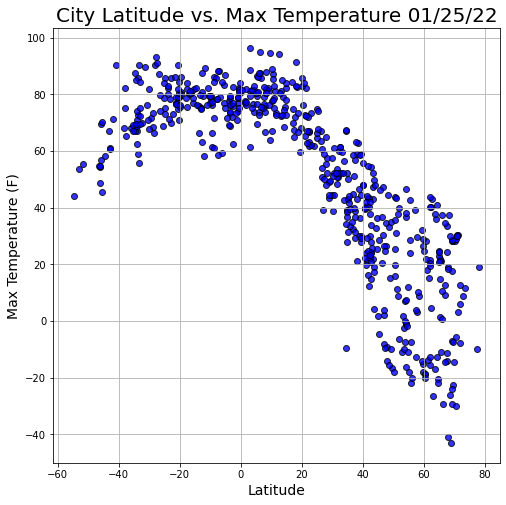

In [12]:
# build the scatter plot for lat v max temp
plt.figure(figsize=(8,8))
plt.scatter(lats, max_temps, edgecolor='k', facecolor='blue', marker='o', alpha=0.8, linewidths=1, label='Cities')
plt.title('City Latitude vs. Max Temperature ' + time.strftime('%x'), fontsize=20)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temperature (F)', fontsize=14)
plt.grid(True)
# Save the Figure
plt.savefig('weather_data/Fig1.png')




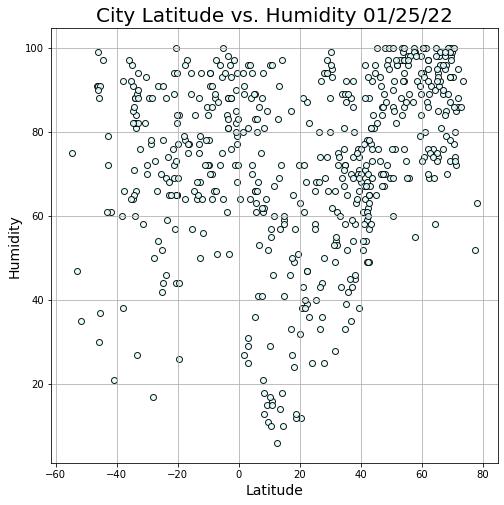

In [13]:
# build the scatter plot for lat v humidity
plt.figure(figsize=(8,8))
plt.scatter(lats, humidity, edgecolor='k', facecolor='lightcyan', marker='o', alpha=0.9, linewidths=1, label='Cities')
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'), fontsize=20)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity', fontsize=14)
plt.grid(True)
# Save the Figure
plt.savefig('weather_data/Fig2.png')


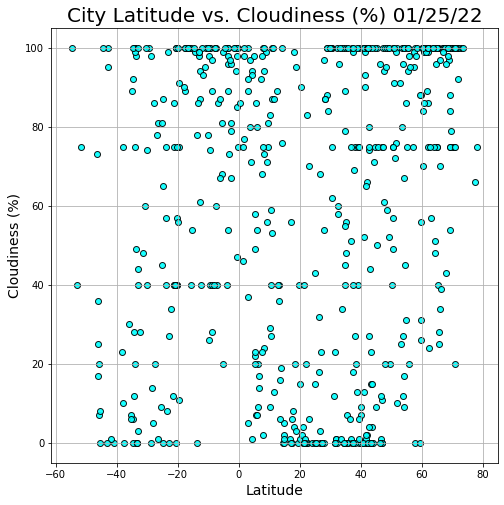

In [14]:
# build the scatter plot for lat v cloudiness
plt.figure(figsize=(8,8))
plt.scatter(lats, cloudiness, edgecolor='k', facecolor='aqua', marker='o', alpha=0.9, linewidths=1, label='Cities')
plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime('%x'), fontsize=20)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness (%)', fontsize=14)
plt.grid(True)
# Save the Figure
plt.savefig('weather_data/Fig3.png')

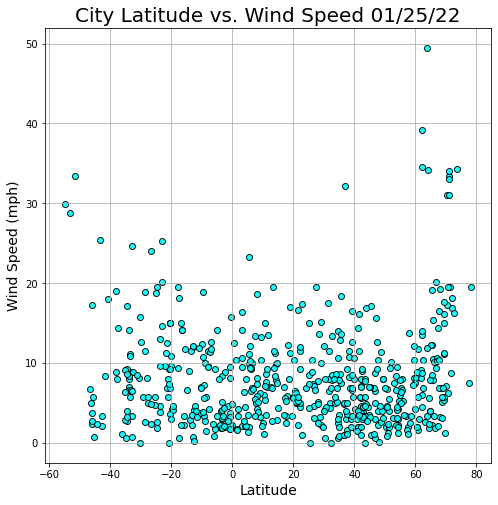

In [15]:
# build the scatter plot for lat v wind speed
plt.figure(figsize=(8,8))
plt.scatter(lats, wind_speed, edgecolor='k', facecolor='aqua', marker='o', alpha=0.9, linewidths=1, label='Cities')
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'), fontsize=20)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (mph)', fontsize=14)
plt.grid(True)
# Save the Figure
plt.savefig('weather_data/Fig4.png')

In [31]:
# create linregress function that performs the regression, plots it, and plots the weather data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # calculate the regression values
    regress_values = x_values * slope + intercept
    # get the equation of the line
    line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
    #Create the scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r')
    #Annotate the text for the line equation and add figure labels
    plt.annotate(line_eq, text_coordinates, color='red', fontsize=15 )
    plt.title(title, fontsize=14)
    plt.xlabel('Latitude', fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.show()


In [32]:
# loc practice
index13 = city_data_df.loc[13]
index13

City               Ribeira Grande
Country                        PT
Date          2022-01-25 17:48:28
Lat                       38.5167
Lng                         -28.7
Max Temp                     63.0
Humidity                       63
Cloudiness                     20
Wind Speed                   6.91
Name: 13, dtype: object

In [33]:
# create northern and southern hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] <0)]


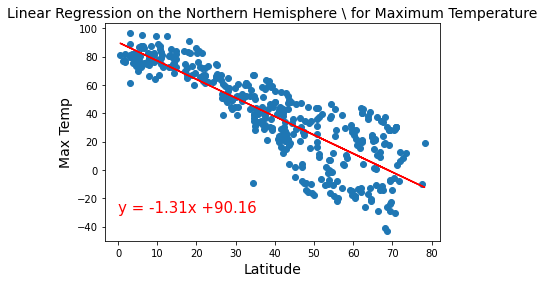

In [34]:
# northern hemisphere linear regression for max temperature
n_x_values = northern_hemi_df['Lat']
n_y_values = northern_hemi_df['Max Temp']
plot_linear_regression(n_x_values, n_y_values, 'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp', (0, -30))

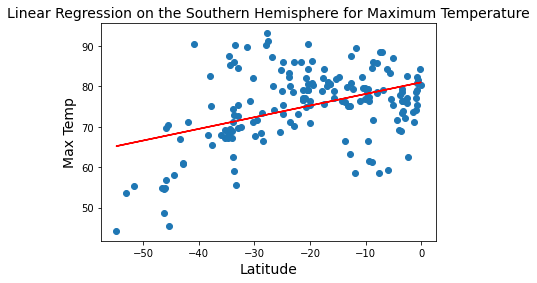

In [35]:
#Southern Hemisphere Regression
s_x_values = southern_hemi_df['Lat']
s_y_values = southern_hemi_df['Max Temp']
plot_linear_regression(s_x_values, s_y_values, 'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp', (-55,100 ))

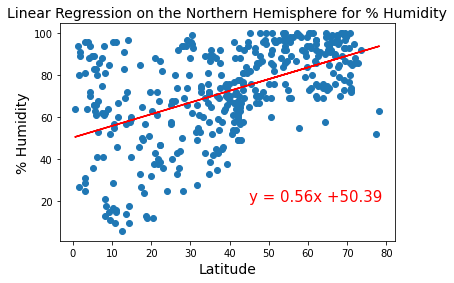

In [36]:
#Northern Hemisphere % Humidity linear regression
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity', (45,20))

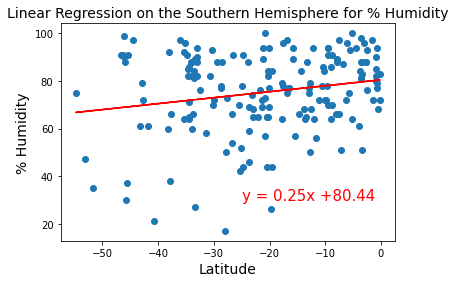

In [40]:
#southern Hemisphere % Humidity linear regression
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity', (-25,30))

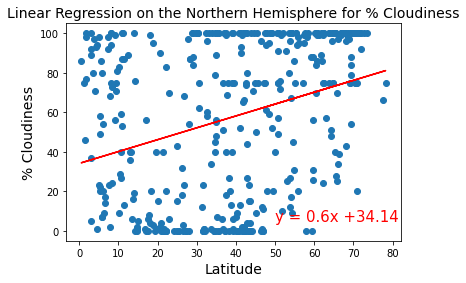

In [45]:
#Northern Hemisphere % Humidity linear regression
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness', (50,5))

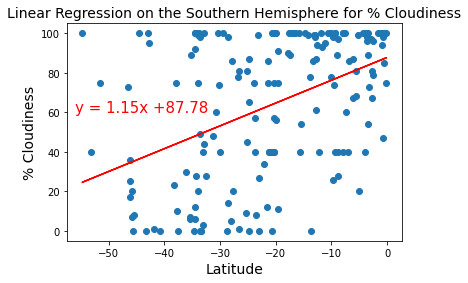

In [53]:
#southern Hemisphere % Humidity linear regression
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness', (-56,60))

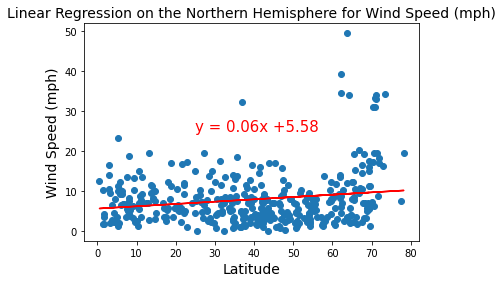

In [54]:
#Northern Hemisphere % Humidity linear regression
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Wind Speed (mph)', 'Wind Speed (mph)', (25,25))

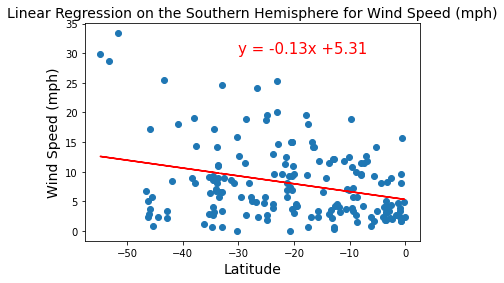

In [56]:
#Southern Hemisphere % Humidity linear regression
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Wind Speed (mph)', 'Wind Speed (mph)', (-30,30))